filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [2]:
# Load the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Initial Data Exploration

In [3]:
# Shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns. \n')

# Info about the dataset
print('Data Types and Nulls:')
df.info()

# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())

# Descriptive statistics
print('\nStatistical summary:')
df.describe().T

Dataset contains 21613 rows and 22 columns. 

Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-n

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,1.080600e+04,6.239280e+03,0.000000e+00,5.403000e+03,1.080600e+04,1.620900e+04,2.161200e+04
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21600.0,3.372870e+00,9.266567e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21603.0,2.115736e+00,7.689959e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


# Summary:
-  Dataset contains 21,613 rows and 22 columns.
-  There are some missing values in 'bedrooms' (13) and 'bathrooms' (10).
-  The 'date' column is object type; we may need to convert it to datetime.
-  Unusual values detected:
  - Max bedrooms = 33 (likely an outlier).
  - Max bathrooms = 8.
  - sqft_living goes up to 13,540 — possibly a mansion.





---
# Data Wrangling


In [4]:
# Delete unimportant columns
df = df.drop(['Unnamed: 0','id'],axis=1)

In [5]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Check missing values before handling them.
print(df.isnull().sum())

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


In [7]:
# Calculate mean for 'bedrooms' and 'bathrooms'
mean_bedrooms = df['bedrooms'].mean()
mean_bathrooms = df['bathrooms'].mean()

In [8]:
# Replace missing values with mean using replace() with inplace=True
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean_bedrooms)
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean_bathrooms)

In [9]:
# Verify that missing values have been replaced
print("\nAfter replacing NaN values:")
print("Number of NaN values for 'bedrooms':",df['bedrooms'].isnull().sum())
print("Number of NaN values for 'bathrooms':" ,df['bathrooms'].isnull().sum())


After replacing NaN values:
Number of NaN values for 'bedrooms': 0
Number of NaN values for 'bathrooms': 0




---

# Exploratory Data Analysis

In [10]:
# Count the number of houses with each unique floor value and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


Most houses have 1.0 or 2.0 floors.

Very few houses have unusual floor values like 3.5, which may be rare designs or potential data entry inconsistencies.



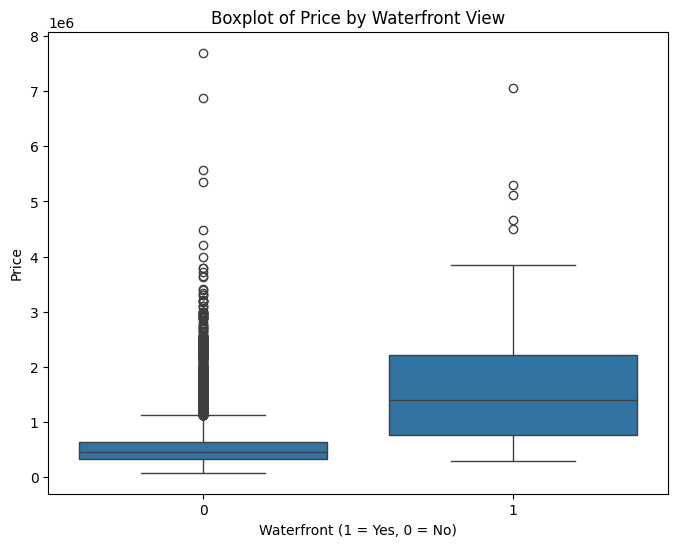

In [11]:
# Boxplot for waterfront view vs price outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Price by Waterfront View')
plt.xlabel('Waterfront (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.show()

Properties with a waterfront (waterfront = 1) tend to have significantly higher prices

and a higher median compared to those without a waterfront view (waterfront = 0).

The plot also shows that both categories have several high-price outliers,

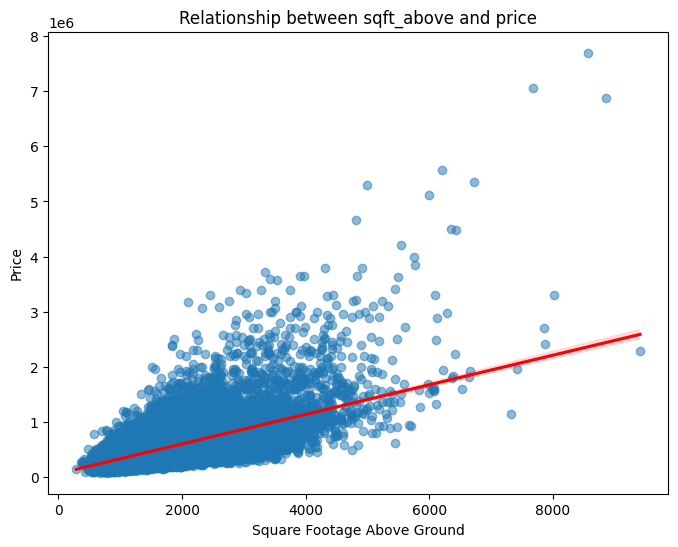

In [12]:
# Regplot for sqft_above vs price
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above',y='price',data=df,scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('Relationship between sqft_above and price')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()

The scatter plot with regression line shows a positive correlation between square footage above ground (sqft_above) and house price. As the above-ground square footage increases, house prices tend to increase as well.



In [19]:
# Correlation of all features with price
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print("Top 10 features most correlated with price:")
print(correlation_with_price.head(10))

Top 10 features most correlated with price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
Name: price, dtype: float64




---
# Model Development


# Simple Linear Regression using long

In [21]:
# Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
x = df[['long']]
y = df['price']
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.00046769430149007363

The R² value is close to zero → means that the long property does not have a strong impact on the house price.



---
# Simple Linear Regression using sqft_living


In [23]:
# Linear Regression Model Using Feature sqft_living
x = df[['sqft_living']]
y = df['price']

lm = LinearRegression()
lm.fit(x,y)
r2_score = lm.score(x,y)

print("R² score using 'sqft_living':", r2_score)

R² score using 'sqft_living': 0.4928532179037931


This means that about 49.3% of the variability in house prices can be explained solely by the size of the living area. While this indicates a strong relationship between house size and price, it also suggests that other features and factors contribute significantly to price variation.

Therefore, incorporating additional relevant features into the model is important for improving predictive accuracy.





---
# Multiple Linear Regression using Multiple Features


In [24]:
# Fit a linear regression model to predict the 'price' using the list of features:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x = df[features]
y = df['price']

lm = LinearRegression()
lm.fit(x,y)

r2_score = lm.score(x,y)
print("R² score using multiple features:", r2_score)


R² score using multiple features: 0.65769516660375


The model achieved an R² score of 0.6577, meaning that approximately 65.8% of the variation in house prices can be explained by these features.

Compared to the simpler model using only sqft_living (R² = 0.4928), this multivariate approach provides a significantly better fit.

This suggests that house prices are influenced by multiple combined factors rather than a single attribute. Therefore, including diverse relevant features improves the model’s predictive power.



# Polynomial Regression Pipeline (StandardScaler + PolynomialFeatures + LinearRegression)


In [26]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

x = df[features]
y = df['price']

# Create a pipeline with scaling, polynomial feature generation, and linear regression
input = [
    ('scale',StandardScaler()),
    ('polynomial',PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
]

pipe = Pipeline(input)

pipe.fit(x,y)
r2_pipeline = pipe.score(x,y)

print("R² score using pipeline with polynomial features:", r2_pipeline)


R² score using pipeline with polynomial features: 0.7513408515988734


To improve prediction accuracy, i built a machine learning pipeline, The model achieved an R² score of 0.7513, indicating that ~75.1% of the variation in house prices can be explained by this polynomial regression model.
This shows a significant improvement compared to using simple linear models on single or multiple features.







---
# Model Evaluation and Refinement


### Ridge Regression on Original Features
Use Ridge Regression instead of Linear Regression, because it helps reduce overfitting by reducing the size of the model coefficients using regularization.

In [27]:
# Code: Ridge Regression with Regularization (alpha=0.1)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Select features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

x = df[features]
y = df['price']

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=1)

# Create and train Ridge regression model
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)

# Evaluate the model using R² score on the test set
r2_ridge = RidgeModel.score(x_test,y_test)

print("R² score with Ridge regression:", r2_ridge)

R² score with Ridge regression: 0.6478759163939113


After training the model on 85% of the data and testing on 15%, i achieved an R² score of 0.6479.
This means the model explains approximately 64.79% of the variance in house prices.
While not perfect, it performs better than using a single feature and is computationally simpler than polynomial models.

### Polynomial Features + Ridge Regression

In [28]:
# Perform 2nd-degree polynomial transform on features
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and train Ridge regression model on polynomial features
RidgePolyModel = Ridge(alpha=0.1)
RidgePolyModel.fit(x_train_poly,y_train)

# Evaluate the model
r2_poly_ridge = RidgePolyModel.score(x_test_poly,y_test)
print("R² score with Ridge + Polynomial features:", r2_poly_ridge)

R² score with Ridge + Polynomial features: 0.7002744233733298


After training and evaluation, the model achieved an R² score of 0.7003 on the test set.
This means the model explains approximately 70.03% of the variance in house prices, which is a notable improvement over the basic linear Ridge model.
However, the tradeoff is increased model complexity and computation time.





---

| Model                             | R² Score | Notes                                |
| --------------------------------- | -------- | ------------------------------------ |
| Linear Regression (sqft\_living)  | 0.4929   | Single feature only                  |
| Linear Regression (multi-feature) | 0.6577   | Multiple features                    |
| Pipeline (Polynomial + Linear)    | 0.7513   | Polynomial + StandardScaler + Linear |
| Ridge Regression                  | 0.6479   | Regularized linear model             |
| Ridge + Polynomial Features       | 0.7003   | Non-linear + regularized             |




---

# Example Price Predictions Using the Final Ridge Regression Model

In [30]:
# 1. Define new houses with their features
new_houses = pd.DataFrame([
    [1.0, 0, 47.6, 3, 0.0, 0, 1.0, 1340.0, 1340.0, 6, 1340.0],   # Small basic house, not waterfront
    [2.0, 1, 47.7, 4, 500.0, 3, 2.5, 2500.0, 2000.0, 9, 3000.0], # Luxury waterfront house
    [1.0, 0, 47.55, 2, 0.0, 0, 1.0, 1000.0, 1000.0, 5, 1000.0]   # Small, average house
], columns=features)

# 2. Make sure all values are float
new_houses = new_houses.astype(float)

# 3. Apply the same polynomial transformation used during training
new_houses_poly = poly.transform(new_houses)

# 4. Predict prices using the trained Ridge regression model
predicted_prices = RidgePolyModel.predict(new_houses_poly)

# 5. Display predictions
for i, price in enumerate(predicted_prices):
    print(f"🏠 Estimated Price for House {i+1}: ${price:,.2f}")


🏠 Estimated Price for House 1: $311,907.69
🏠 Estimated Price for House 2: $1,890,630.86
🏠 Estimated Price for House 3: $240,174.39
